### Student Information
Name: 徐偉晉

Student ID: 109022127

GitHub ID: Wayne48763

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [107]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download('punkt')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yhn96\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [4]:
# import my functions from ../helpers/data_mining_helpers
import sys
sys.path.append("..")
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

---

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
#Answer here
# query the last 5 rows of the dataframe backwards
X.text[::-1][:5]

2256    From: dyer@spdcc.com (Steve Dyer) Subject: Re:...
2255    From: Dan Wallach <dwallach@cs.berkeley.edu> S...
2254    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2253    From: mhollowa@ic.sunysb.edu (Michael Holloway...
2252    From: roos@Operoni.Helsinki.FI (Christophe Roo...
Name: text, dtype: object

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [6]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [7]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

For missing example of id C, D, and F, their data type is string, so it can't be detected by `.isnull()`. <br>

While for <br>
id A, it's NaN in numeric arrays<br>
id B, it has no value<br>
id E, it's `None` type <br>
so they can be detected by `.isnull()`.

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [8]:
# Answer here
X_sample_1 = X.sample(n=3, random_state=0)
X_sample_2 = X.sample(n=3, random_state=1)
X_sample_3 = X.sample(n=2, random_state=1)
print(X_sample_1['text'])
print(X_sample_2['text'])
print(X_sample_3['text'])

1604    From: ss6349@csc.albany.edu (Steven H. Schimmr...
1036    From: sasghm@theseus.unx.sas.com (Gary Merrill...
2144    From: berger@chaos.cs.brandeis.edu (David Berg...
Name: text, dtype: object
367     From: echen@burn.ee.washington.edu (Ed Chen) S...
2108    From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...
2170    From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...
Name: text, dtype: object
367     From: echen@burn.ee.washington.edu (Ed Chen) S...
2108    From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...
Name: text, dtype: object


`.sample()` will randomly select rows from the dataframe, so the order of the index are different from the original dataframe. <br>
Also, the random state changes the result of the random selection.

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

<Axes: title={'center': 'Category distribution'}>

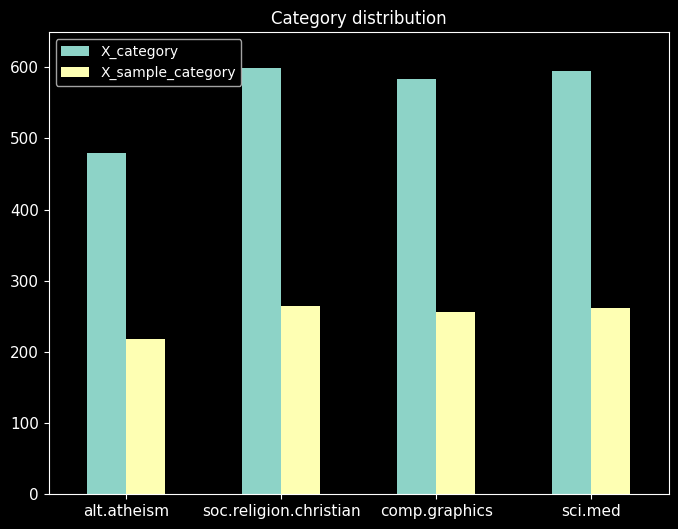

In [9]:
# Answer here
X_sample = X.sample(n=1000, random_state=0)
y_lim_upper = max(max(X_sample.category_name.value_counts()), max(X.category_name.value_counts())) + 50

category_df = pd.DataFrame({'X_category': X.category_name.value_counts(),
                            'X_sample_category': X_sample.category_name.value_counts()}, 
                            index = categories)
category_df.plot(kind='bar', 
                    title='Category distribution',
                    ylim=[0, y_lim_upper], 
                    rot=0, fontsize=11, figsize=(8,6))                                

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

---

In [10]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [12]:
analyze = count_vect.build_analyzer()

In [13]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
# Answer here
print(count_vect.inverse_transform(X_counts[4, 0:100].toarray()))

[array(['00', '01'], dtype='<U80')]


`.inverse_transform()` can transform the vector back to the original text. <br>
By inverse transform the vector, we can find the word that another 1 represents from the vocabulary, which is `01`.

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

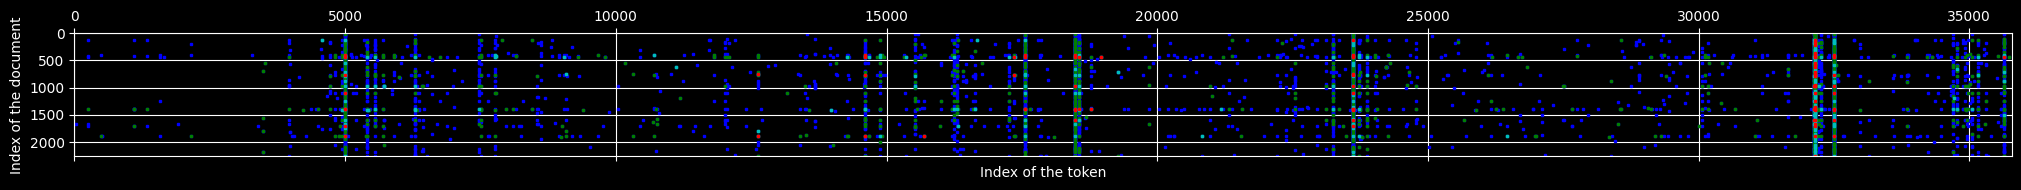

In [15]:
# Answer here
plt.figure(figsize=(25, 20))
precision = [10, 20, 50, 100]
colors = ['b', 'g', 'c', 'r', 'm', 'y', 'k', 'w'][:len(precision)]

for p, c in zip(precision, colors):
    plt.spy(X_counts, precision=p, color=c, markersize=2)
plt.grid(True)
plt.xlabel('Index of the token')
plt.ylabel('Index of the document')
plt.show()


I use `.spy()` to plot the entire term-document matrix. <br>
Because the matrix is too large, Using `.spy()` can help me fileter out the those words that are not that frequent.<br>
This way, I can get a better visualization. 

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [16]:
# Answer here
from sklearn.decomposition import PCA

print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


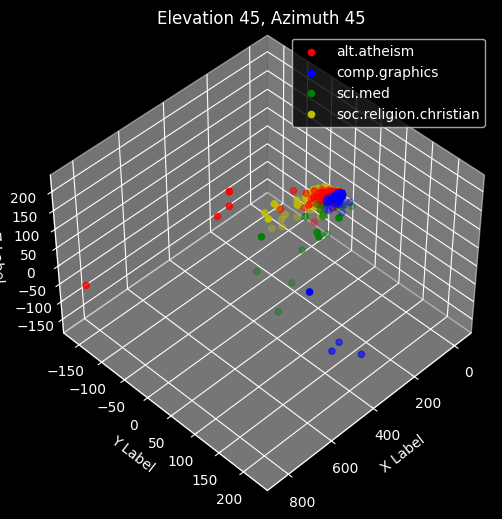

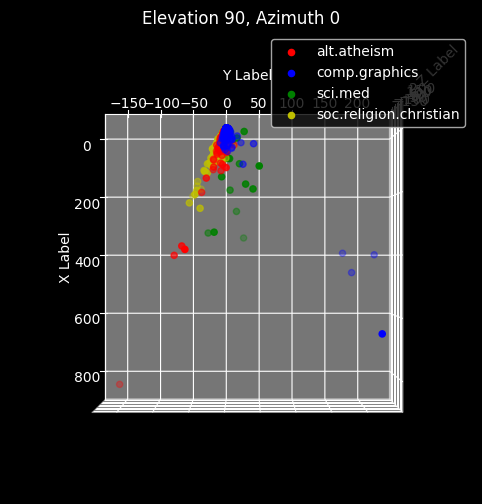

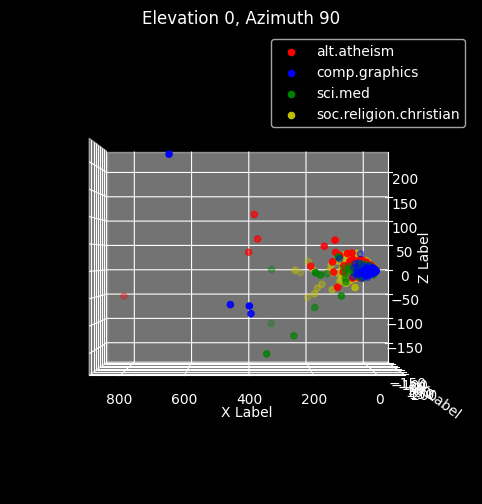

In [17]:
from mpl_toolkits.mplot3d import Axes3D
color_category = {'alt.atheism': 'r', 
                  'comp.graphics': 'b', 
                  'sci.med': 'g', 
                  'soc.religion.christian': 'y'}

def plot_3D(elev=30, azim=30):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection='3d')
    for category in color_category:
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=color_category[category], label=category)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()
    ax.grid(True)
    ax.set_title('Elevation {}, Azimuth {}'.format(elev, azim))
    ax.view_init(elev=elev, azim=azim)
    plt.show()

for elev, azim in [(45, 45), (90, 0), (0, 90)]:
    plot_3D(elev, azim)
        

From the 3-D plot, we can see how the data is distributed in the 3-D space. <br>
And the transparancy of the points let us know the whether the points are closer to the camera or not. <br>

---

In [18]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [19]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [20]:
term_frequencies[0] #sum of first term: 00

134

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [21]:
# Answer here
import plotly.express as px
import plotly.graph_objects as go

In [22]:
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

By using plotly, we can get a better visualization. <br>

---

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [23]:
# Answer here
# By setting threshold, we can filter out the terms that are less frequent
threshold = np.percentile(term_frequencies, 99.85)
print(threshold)

1617.0994999999093


In [24]:
count_vec_lim = count_vect.get_feature_names_out()[term_frequencies > threshold]
term_frequencies_lim = term_frequencies[term_frequencies > threshold]

In [25]:
fig = px.bar(x=count_vec_lim, y=term_frequencies_lim, color=term_frequencies_lim)
fig.show()

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [26]:
# Answer here
# sort the term frequencies in descending order
sort_indices = np.argsort(term_frequencies_lim)[::-1]
count_vec_lim_sorted = count_vec_lim[sort_indices]
term_frequencies_lim_sorted = term_frequencies_lim[sort_indices]

fig = px.bar(x=count_vec_lim_sorted, y=term_frequencies_lim_sorted, color=term_frequencies_lim_sorted)
fig.show()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [27]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [28]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X.head()

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"


Yes, it works. <br>

---
---

## Second Part: New Dataset

#### Load the dataset

In [84]:
# find all dataset files
import glob
from pathlib import Path
data_path = Path('../sentiment labelled sentences/')
filenames = list(data_path.glob('*labelled.txt'))
print(filenames)

[WindowsPath('../sentiment labelled sentences/amazon_cells_labelled.txt'), WindowsPath('../sentiment labelled sentences/imdb_labelled.txt'), WindowsPath('../sentiment labelled sentences/yelp_labelled.txt')]


In [136]:
# =======
# Format:
# =======
# sentence \t score \n

data_df = pd.DataFrame(columns=['sentence', 'score', 'source'])
for filename in filenames:
    sentences = []
    scores = []
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            sentence, score = line.strip().split('\t')
            sentences.append(sentence)
            scores.append(score)
    df = pd.DataFrame({'sentence': sentences, 'score': scores})
    df['source'] = filename.name
    data_df = pd.concat([data_df, df], ignore_index=True)

In [137]:
print(data_df.shape)
data_df.head()

(3000, 3)


,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt
2,Great for the jawbone.,1,amazon_cells_labelled.txt
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt
4,The mic is great.,1,amazon_cells_labelled.txt


---

#### Preprocessing

In [138]:
# check isnull
data_df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [139]:
# check duplicates
print('duplicated records: {}'.format(data_df.duplicated().sum()))
print('before drop: {}'.format(data_df.shape[0]))
# remove duplicates
data_df.drop_duplicates(inplace=True, keep='first')
print('after drop: {}'.format(data_df.shape[0]))

duplicated records: 17
before drop: 3000
after drop: 2983


<Axes: title={'center': 'Score value distribution'}, xlabel='score'>

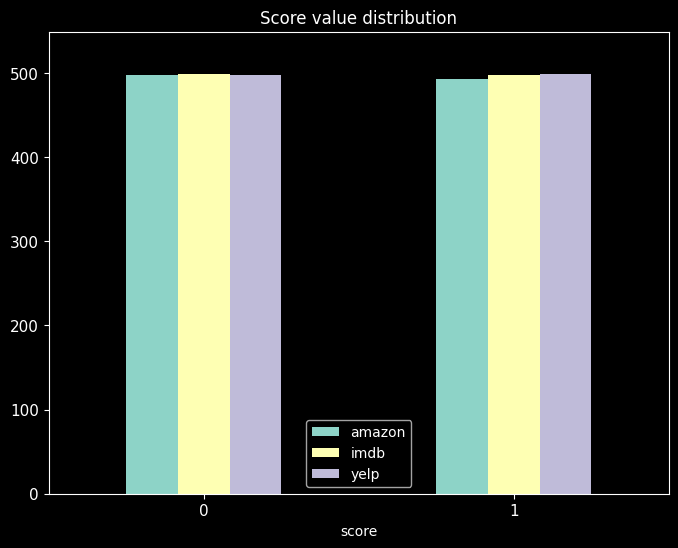

In [140]:
# print score value distribution
svd_df = pd.DataFrame({'amazon': data_df[data_df['source'] == 'amazon_cells_labelled.txt']['score'].value_counts(),
                          'imdb': data_df[data_df['source'] == 'imdb_labelled.txt']['score'].value_counts(),
                          'yelp': data_df[data_df['source'] == 'yelp_labelled.txt']['score'].value_counts()})
y_lim_upper = max(max(svd_df['amazon']), max(svd_df['imdb']), max(svd_df['yelp'])) + 50
svd_df.plot(kind='bar', 
            title='Score value distribution',
            ylim=[0, y_lim_upper], rot=0, fontsize=11, figsize=(8,6))

#### Feature Creation

In [141]:
# unigram
data_df['unigrams'] = data_df['sentence'].apply(lambda x: dmh.tokenize_text(x))
data_df.head()['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

#### Feature subset selection

In [142]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data_df.sentence)
print(X_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [143]:
print(X_counts.shape)

(2983, 5155)


In [144]:
analyze = count_vect.build_analyzer()

#### Plot top 5 most frequent words in the first 10 rows of the dataset

In [145]:
df_10 = data_df[:10]
count_vect_top5 = CountVectorizer(max_features=5)
df_counts_10 = count_vect_top5.fit_transform(df_10.sentence) 
df_counts_10.shape

(10, 5)

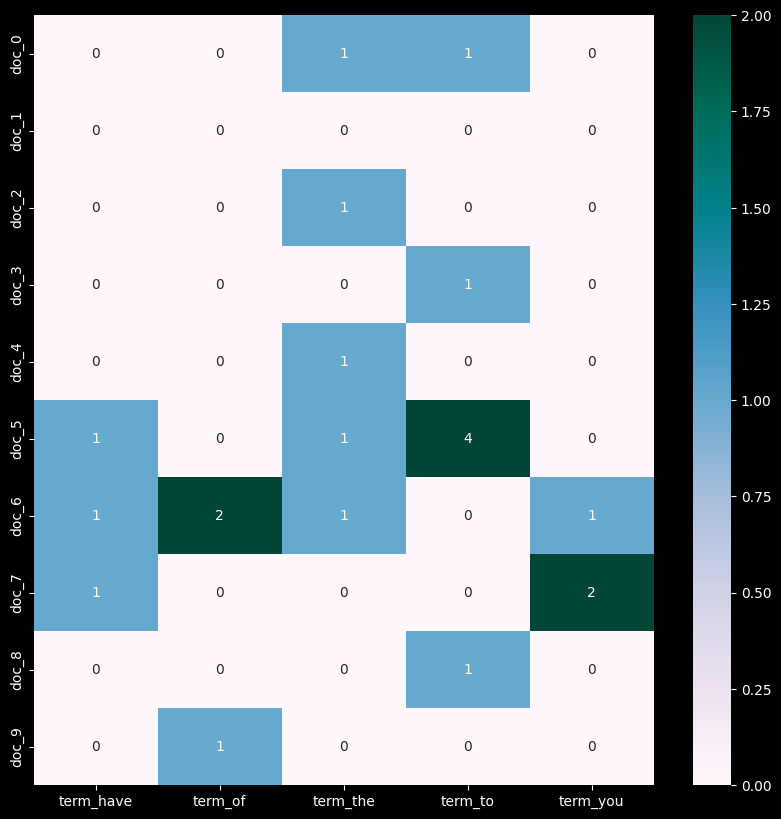

In [146]:
plot_x = ["term_"+str(i) for i in count_vect_top5.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(df_10.index)]
plot_z = df_counts_10.toarray()

df_draw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(df_draw,
                 cmap="PuBuGn",
                 vmin=0, vmax=2, annot=True)

#### PCA

In [153]:
df_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(df_reduced.shape)

(2983, 2)


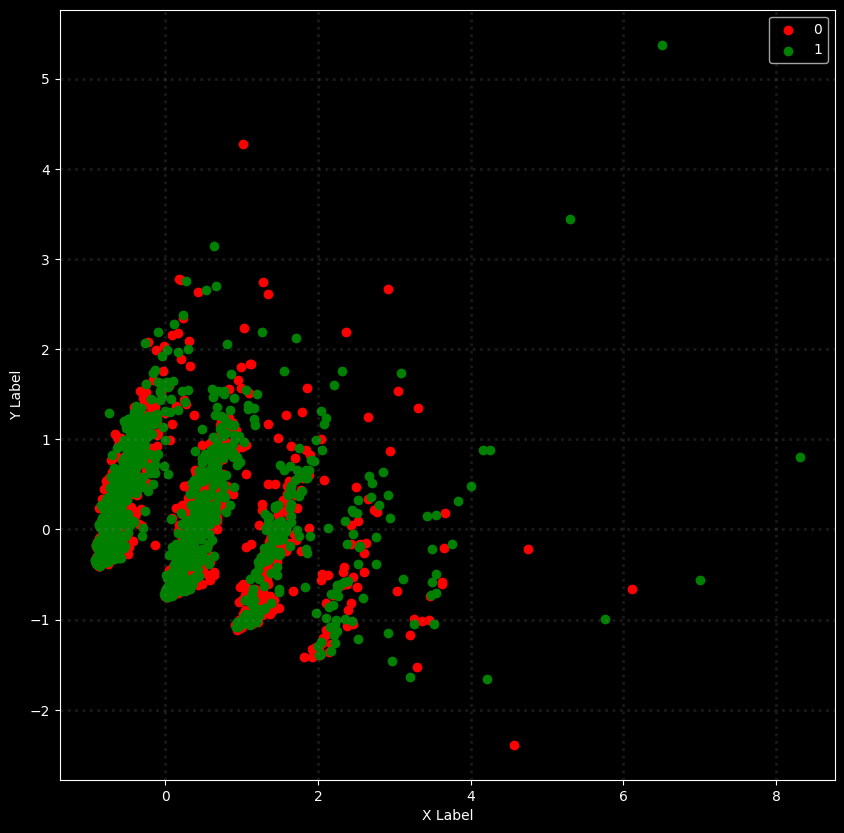

In [156]:
color = ['red', 'green']

fig = plt.figure(figsize = (10,10))
ax = fig.subplots()

for c, score in zip(color, ['0', '1']):
    xs = df_reduced[data_df['score'] == score].T[0]
    ys = df_reduced[data_df['score'] == score].T[1]
    ax.scatter(xs, ys, c=c, label=score)
    
ax.legend()
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

#### Attribute Transformation / Aggregation

In [157]:
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

5155


In [160]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[4161] #sum of first term

171

C:\Users\yhn96\AppData\Local\Temp\ipykernel_35636\3394797538.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



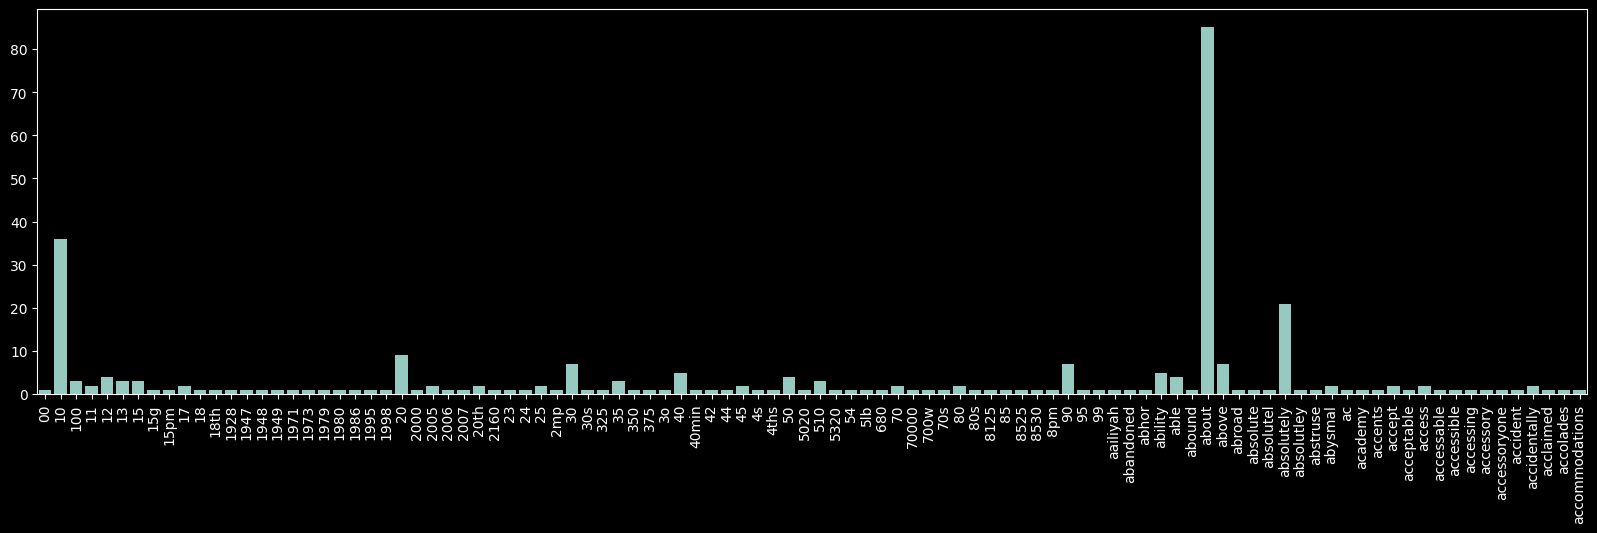

In [168]:
plt.subplots(figsize=(20, 5))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100], 
            y=term_frequencies[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

In [170]:
# set threshold to filter out the terms that are less frequent
threshold = np.percentile(term_frequencies, 99)
print(threshold)

count_vec_lim = count_vect.get_feature_names_out()[term_frequencies > threshold]
term_frequencies_lim = term_frequencies[term_frequencies > threshold]

fig = px.bar(x=count_vec_lim, y=term_frequencies_lim, color=term_frequencies_lim)
fig.show()

# show in descending order
sort_indices = np.argsort(term_frequencies_lim)[::-1]
count_vec_lim_sorted = count_vec_lim[sort_indices]
term_frequencies_lim_sorted = term_frequencies_lim[sort_indices]

fig = px.bar(x=count_vec_lim_sorted, y=term_frequencies_lim_sorted, color=term_frequencies_lim_sorted)
fig.show()

84.46000000000004
